In [115]:
import numpy as np
import pandas as pd
from pandas.plotting import table 
import matplotlib.pyplot as plt
import matplotlib
import six
import warnings
from IPython.display import display  # Print multiple pandas statements in a single cell

warnings.filterwarnings("ignore")
matplotlib.style.use('default')

In [116]:
# Class definitions

class Location(object):
    def init(self, name, population, cases, casesPerMillion):
        
        self.name = name
        self.population = population
        self.cases = cases
        self.casesPerMillion = casesPerMillion

In [117]:
# Function definitions

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=10,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
            
    return ax

In [118]:
data = pd.read_csv(r"C:/Users/Matth/git/DataAnalysisWorkbooks/Covid19/Data/Raw_data/owid-covid-data.csv")

In [119]:
df1 = data.set_index('location')

location = df1.loc['Africa']
location['total_cases'].max()

10162823.0

In [120]:
countries = list(data['location'].unique())
locations = []

# Remove aggregated locations
countries.remove('Africa')
countries.remove('Asia')
countries.remove('North America')
countries.remove('South America')
countries.remove('Europe')
countries.remove('Oceania')
countries.remove('World')
countries.remove('Low income')
countries.remove('High income')
countries.remove('Lower middle income')
countries.remove('Upper middle income')

for i, country in enumerate(countries):
    locations.append( Location() )
    
    temp = df1.loc[country]
    locations[i].name = country
    locations[i].population = temp['population'].max()
    
    locations[i].cases = temp['new_cases'].max()   
    locations[i].casesPerMillion = temp['total_cases_per_million'].max()    

In [121]:
name, casesPerMillion = [], []

for i in range(len(locations)):
    name.append(locations[i].name)
    casesPerMillion.append(locations[i].casesPerMillion)

In [122]:
# Create a dataframe for list of countries and their current total_cases

d = {'Country': countries, 'Cases per million': casesPerMillion}
df = pd.DataFrame(d)

<AxesSubplot:title={'center':'Cases per million'}, ylabel='Density'>

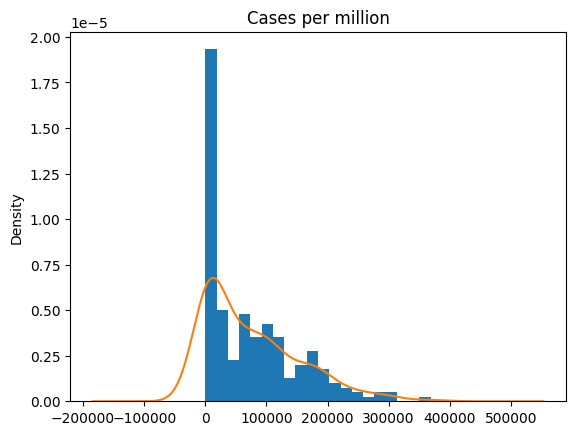

In [123]:
ax = df.hist('Cases per million', grid = False, bins = 20, density=True)
df['Cases per million'].plot.kde()

<AxesSubplot:>

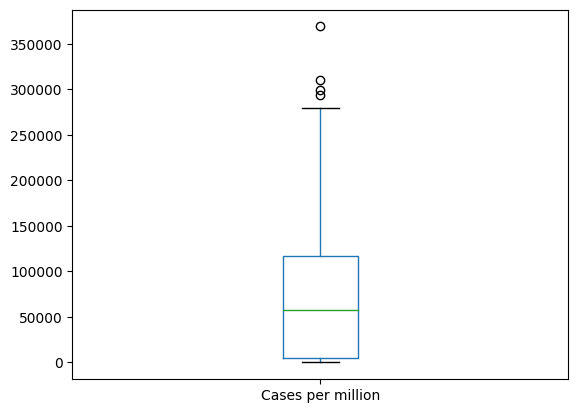

In [124]:
# Box-and-whisker plots of per million data

df.boxplot('Cases per million', grid = False)

Text(0.5, 0.98, '')

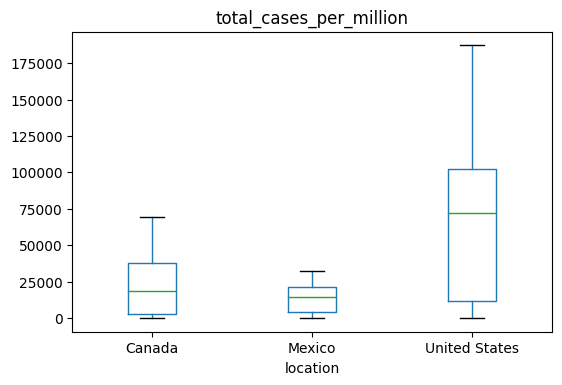

In [125]:
df1 = data[(data['location'] == 'United States') | (data['location'] == 'Canada') | (data['location'] == 'Mexico')]

fig, ax = plt.subplots(figsize=(6,4))
df1.boxplot(column=['total_cases_per_million'], by='location', grid = False, ax=ax)
fig.suptitle('')

In [126]:
# Rank order the top ten countries with the highest Covid19 cases, deaths, vaccinated per capita
save_table = False

if save_table:
    df1 = df.drop('Vacc per capita', 1).drop('Deaths per capita', 1).dropna().round(decimals = 4).sort_values('Cases per capita', axis=0, ascending = False, ignore_index = True).head(10)
    ax = render_mpl_table(df1, header_columns=0, col_width=2.0)
    fig = ax.get_figure()
    fig.savefig('temp1.png')
    
df.dropna().round(decimals = 4).sort_values('Cases per million', axis=0, ascending = False, ignore_index = True).head(10)

,Country,Cases per million
0,Andorra,368978.980
1,Montenegro,309998.710
2,Gibraltar,299664.599
3,Seychelles,293499.141
4,San Marino,279858.865
5,Aruba,266812.818
6,Slovakia,256734.910
7,Georgia,243308.601
8,Slovenia,239813.578
9,Cyprus,236688.411


In [127]:
# Correlation between variables with conditioning

df1 = data.set_index('location')
df2 = df1.loc['United States']


print('Correlation between Covid-19 cases and Covid-19 deaths:')
display(df2['total_cases'].dropna().corr(df2['total_deaths']))
print('---------')

print('Correlation between Covid-19 cases and Covid-19 vaccinations:')
display(df2['total_cases'].dropna().corr(df2['total_vaccinations']))
print('---------')

print('Correlation between Covid-19 deaths and Covid-19 vaccinations:')
display(df2['total_deaths'].dropna().corr(df2['total_vaccinations']))

Correlation between Covid-19 cases and Covid-19 deaths:


0.9931607417570544

---------
Correlation between Covid-19 cases and Covid-19 vaccinations:


0.9275350282298086

---------
Correlation between Covid-19 deaths and Covid-19 vaccinations:


-7.724974972135015e-18

In [128]:
# Correlation matrix
pd.set_option("display.max_rows", None, "display.max_columns", None)  # Shows whole table without "..."
df2.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.000000,0.406682,0.458530,0.993161,0.092315,0.121661,1.000000,0.406682,0.458530,0.993161,0.092313,0.121668,-0.229521,0.101828,0.101827,0.116547,0.116547,NaN,NaN,0.108683,0.108683,0.515966,0.996573,0.996573,0.515963,0.592789,0.592789,-0.039337,0.103659,0.927535,0.895637,0.878713,0.936724,-0.126019,-0.109329,0.927536,0.895638,0.878713,0.936715,-0.109322,-0.418507,-0.418500,-0.058931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990299,0.752291,0.109067,0.990299
new_cases,0.406682,1.000000,0.883292,0.326107,0.438955,0.357979,0.406682,1.000000,0.883292,0.326107,0.438951,0.357979,-0.047224,0.588667,0.588666,0.685807,0.685807,NaN,NaN,0.717006,0.717006,0.656344,0.336945,0.336945,0.656348,0.627655,0.627656,0.601207,-0.464164,0.110024,0.044179,0.050871,0.475640,-0.116064,-0.215628,0.110023,0.044181,0.050867,0.475656,-0.215620,-0.199019,-0.198847,0.204049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095601,0.361588,0.674933,0.095601
new_cases_smoothed,0.458530,0.883292,1.000000,0.371420,0.427543,0.482382,0.458530,0.883292,1.000000,0.371420,0.427539,0.482384,-0.126400,0.724854,0.724853,0.829756,0.829756,NaN,NaN,0.866436,0.866436,0.688102,0.380047,0.380047,0.688101,0.779885,0.779881,0.653034,-0.551380,0.055402,-0.019985,-0.007998,0.519381,-0.229007,-0.256634,0.055400,-0.019982,-0.008004,0.519390,-0.256631,-0.219018,-0.218892,0.259863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.385474,0.507066,0.776512,0.385474
total_deaths,0.993161,0.326107,0.371420,1.000000,0.058099,0.085317,0.993161,0.326107,0.371420,1.000000,0.058098,0.085325,-0.284264,0.020211,0.020210,0.031572,0.031572,NaN,NaN,0.023309,0.023309,0.517558,0.992533,0.992533,0.517556,0.590975,0.590976,-0.116367,0.166099,0.956463,0.939590,0.916463,0.941794,-0.070565,-0.042752,0.956464,0.939589,0.916463,0.941781,-0.042744,-0.368147,-0.368164,-0.465198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995838,0.805703,-0.036655,0.995838
new_deaths,0.092315,0.438955,0.427543,0.058099,1.000000,0.816797,0.092315,0.438955,0.427543,0.058099,1.000000,0.816795,-0.293178,0.677150,0.677151,0.672439,0.672440,NaN,NaN,0.624678,0.624678,0.616996,0.049543,0.049543,0.616983,0.438642,0.438633,0.479107,-0.481550,-0.418608,-0.463100,-0.439248,-0.106868,0.113348,-0.139202,-0.418604,-0.463090,-0.439248,-0.106858,-0.139203,-0.014863,-0.014712,0.383100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.229688,0.027439,0.703488,-0.229688
new_deaths_smoothed,0.121661,0.357979,0.482382,0.085317,0.816797,1.000000,0.121661,0.357979,0.482382,0.085317,0.816799,1.000000,-0.392375,0.802788,0.802788,0.7933

<AxesSubplot:xlabel='new_cases_per_million'>

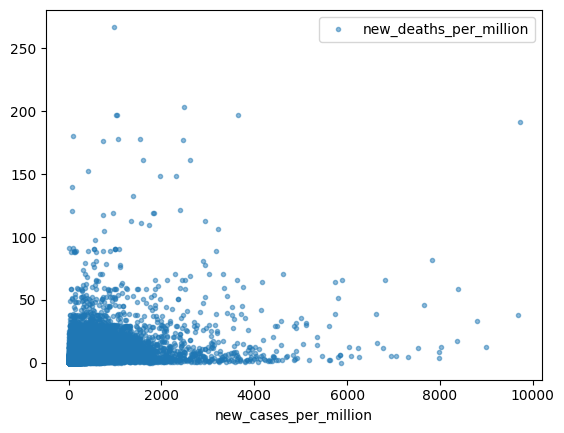

In [129]:
# Scatter plot

df1 = data.loc[(0 < data['new_cases_per_million']) & (data['new_cases_per_million'] < 10000)]
df2 = df1.loc[0 < data['new_deaths_per_million']]
df2.plot(x='new_cases_per_million', y='new_deaths_per_million', style='.', alpha = 0.5)

The data has too much overlap in the bottom-left of the axis, so add a third dimension.

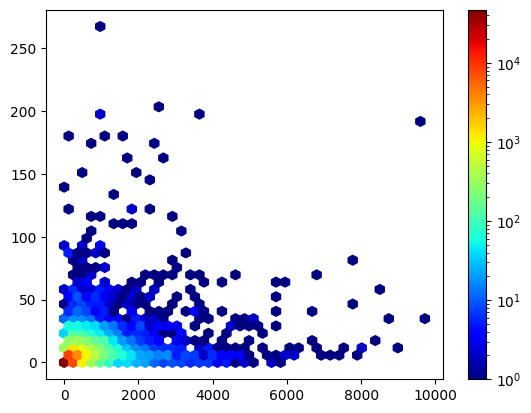

In [130]:
# Matplotlib heatmap (hexbin)

df1 = data.loc[(0 < data['new_cases_per_million']) & (data['new_cases_per_million'] < 10000)]
df2 = df1.loc[0 < data['new_deaths_per_million']]

plt.hexbin(df2['new_cases_per_million'], df2['new_deaths_per_million'], gridsize=40, cmap=cm.jet, bins='log')
plt.colorbar()